In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [34]:
ix = abs(df.corr()).sort_values('outcome', ascending=False).index
ix

Index(['outcome', 'Anion gap', 'Bicarbonate', 'Lactic acid', 'Leucocyte',
       'Urea nitrogen', 'Blood calcium', 'Urine output', 'RDW', 'INR', 'PH',
       'PT', 'Blood potassium', 'Systolic blood pressure', 'Lymphocyte',
       'heart rate', 'NT-proBNP', 'Comorbidities', 'Respiratory rate',
       'temperature', 'Platelets', 'Diastolic blood pressure', 'Magnesium ion',
       'SP O2', 'Creatine kinase', 'Neutrophils', 'Blood sodium', 'Chloride',
       'PCO2', 'Creatinine', 'MCV', 'glucose', 'MCHC', 'EF', 'RBC',
       'Basophils', 'hematocrit', 'MCH'],
      dtype='object')

In [8]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [9]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
        
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [11]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train_old, y_train_old)
Counter(y_train)

Counter({0.0: 394, 1.0: 530})

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       394
         1.0       0.87      0.87      0.87       530

    accuracy                           0.85       924
   macro avg       0.85      0.85      0.85       924
weighted avg       0.85      0.85      0.85       924

[[325  69]
 [ 67 463]]
root mean squared error (RMSE): 0.3836484682442342
R-squared (R2 ): 0.39821856144047507
MAE 0.1471861471861472

Testing SET
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83       250
         1.0       0.34      0.77      0.47        44

    accuracy                           0.74       294
   macro avg       0.64      0.75      0.65       294
weighted avg       0.86      0.74      0.77       294

[[183  67]
 [ 10  34]]
root mean squared error (RMSE): 0.511766315719159
R-squared (R2 ): -1.0579999999999998
MAE 0.2619047619047619

Accuracy score: 0.7380952380952381



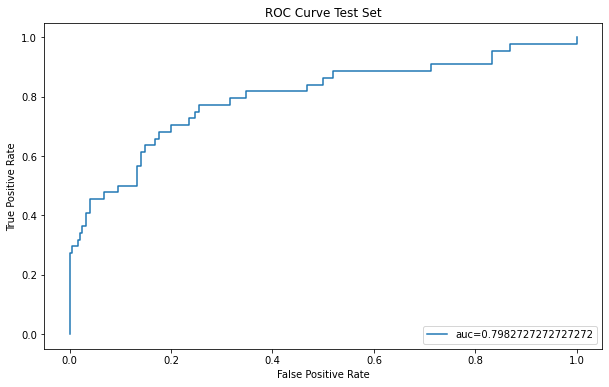

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                     Feature  Importance
34                      PCO2    1.150224
0                 heart rate    0.732890
7                 hematocrit    0.729542
19                       INR    0.712504
23             Urea nitrogen    0.651399
36             Comorbidities    0.595219
3           Respiratory rate    0.546319
33               Lactic acid    0.368625
12                       RDW    0.362058
21           Creatine kinase    0.348908
29                 Anion gap    0.327644
30             Magnesium ion    0.325157
10                      MCHC    0.275768
28                  Chloride    0.272401
31                        PH    0.245182
1    Systolic blood pressure    0.219025
25           Blood potassium    0.184856
13                 Leucocyte    0.174848
35                        EF    0.121494
9                        MCH    0.046291
14                 Platelets   -0.012665
5                      SP O2   -0.038189
15               Neutrophils   -0.076307
20              

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.78       250
         1.0       0.24      0.55      0.33        44

    accuracy                           0.67       294
   macro avg       0.57      0.62      0.56       294
weighted avg       0.80      0.67      0.72       294

[[174  76]
 [ 20  24]]
root mean squared error (RMSE): 0.5714285714285714
R-squared (R2 ): -1.5658181818181816
MAE 0.32653061224489793

Accuracy score: 0.673469387755102



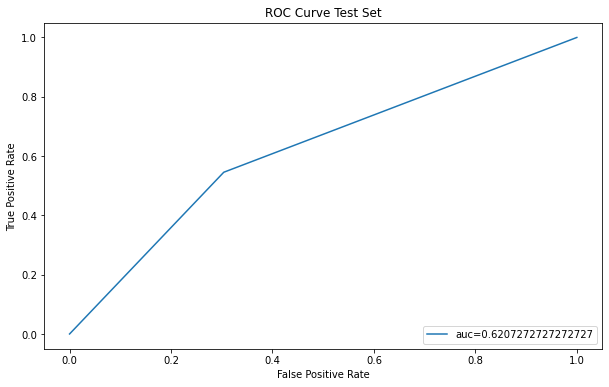

In [15]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       250
         1.0       0.33      0.59      0.42        44

    accuracy                           0.76       294
   macro avg       0.62      0.69      0.64       294
weighted avg       0.83      0.76      0.78       294

[[197  53]
 [ 18  26]]
root mean squared error (RMSE): 0.4914230342988165
R-squared (R2 ): -0.8976363636363633
MAE 0.24149659863945577

Accuracy score: 0.7585034013605442



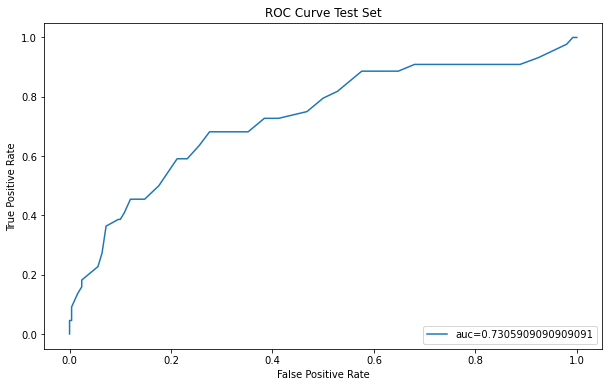

In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [17]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.217666434296234, 'Urine output'),
 (0.06594904744769216, 'Urea nitrogen'),
 (0.04591147646427099, 'Bicarbonate'),
 (0.035692360312736905, 'PH'),
 (0.03538824200892775, 'NT-proBNP'),
 (0.03500412626397198, 'Blood calcium'),
 (0.03159858249251716, 'Lymphocyte'),
 (0.02976449301211133, 'RDW'),
 (0.02872513735357923, 'Lactic acid'),
 (0.026106290523419236, 'Leucocyte'),
 (0.02449255542914361, 'Diastolic blood pressure'),
 (0.024266060818107203, 'Comorbidities'),
 (0.023104992265758444, 'Respiratory rate'),
 (0.021411817799081086, 'temperature'),
 (0.021364336044570192, 'Blood sodium'),
 (0.02108161921298277, 'Anion gap'),
 (0.02088399147031989, 'heart rate'),
 (0.020283334415217836, 'Neutrophils'),
 (0.019797848920351073, 'SP O2'),
 (0.01729899565236361, 'PCO2'),
 (0.016977200624140456, 'PT'),
 (0.016243525999588174, 'Magnesium ion'),
 (0.015772033024057365, 'Creatinine'),
 (0.015367834495910433, 'Creatine kinase'),
 (0.015218328382317051, 'INR'),
 (0.014676409712568754, 'RBC'),
 (0.01

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       250
         1.0       0.42      0.55      0.48        44

    accuracy                           0.82       294
   macro avg       0.67      0.71      0.68       294
weighted avg       0.84      0.82      0.83       294

[[217  33]
 [ 20  24]]
root mean squared error (RMSE): 0.42458463095540494
R-squared (R2 ): -0.41654545454545433
MAE 0.18027210884353742

Accuracy score: 0.8197278911564626



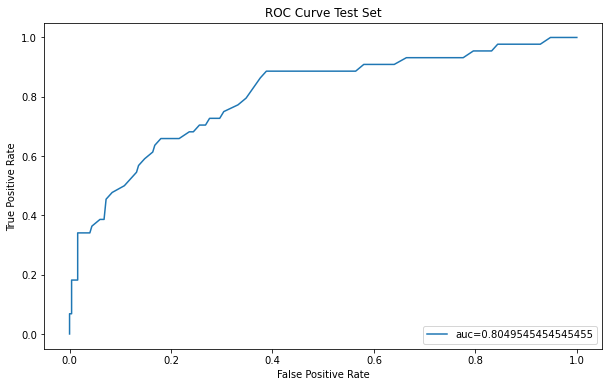

In [18]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       394
         1.0       0.96      0.98      0.97       530

    accuracy                           0.97       924
   macro avg       0.97      0.96      0.97       924
weighted avg       0.97      0.97      0.97       924

[[372  22]
 [  8 522]]
root mean squared error (RMSE): 0.1801874925391118
R-squared (R2 ): 0.8672540944353989
MAE 0.032467532467532464

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       250
         1.0       0.37      0.68      0.48        44

    accuracy                           0.78       294
   macro avg       0.65      0.74      0.67       294
weighted avg       0.85      0.78      0.80       294

[[198  52]
 [ 14  30]]
root mean squared error (RMSE): 0.47380354147934284
R-squared (R2 ): -0.7639999999999998
MAE 0.22448979591836735

Accuracy score: 0.7755102040816326



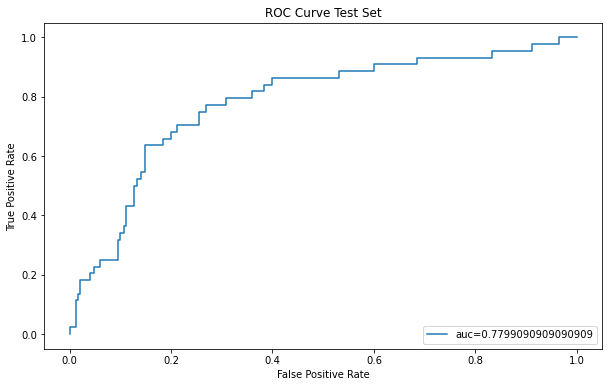

In [19]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83       250
         1.0       0.30      0.59      0.40        44

    accuracy                           0.73       294
   macro avg       0.61      0.67      0.61       294
weighted avg       0.82      0.73      0.76       294

[[189  61]
 [ 18  26]]
root mean squared error (RMSE): 0.5183700251685057
R-squared (R2 ): -1.1114545454545453
MAE 0.2687074829931973

Accuracy score: 0.7312925170068028



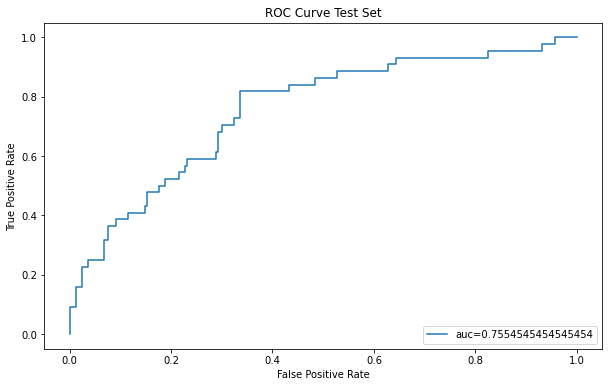

In [20]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       250
         1.0       0.37      0.59      0.45        44

    accuracy                           0.79       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.84      0.79      0.80       294

[[205  45]
 [ 18  26]]
root mean squared error (RMSE): 0.4629100498862757
R-squared (R2 ): -0.6838181818181817
MAE 0.21428571428571427

Accuracy score: 0.7857142857142857



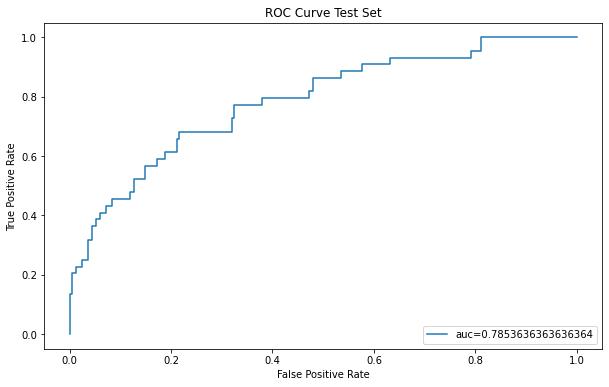

In [21]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       394
         1.0       1.00      1.00      1.00       530

    accuracy                           1.00       924
   macro avg       1.00      1.00      1.00       924
weighted avg       1.00      1.00      1.00       924

[[394   0]
 [  0 530]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       250
         1.0       0.38      0.64      0.48        44

    accuracy                           0.79       294
   macro avg       0.66      0.73      0.67       294
weighted avg       0.85      0.79      0.81       294

[[205  45]
 [ 16  28]]
root mean squared error (RMSE): 0.4555030111835474
R-squared (R2 ): -0.6303636363636362
MAE 0.20748299319727892

Accuracy score: 0.7925170068027211



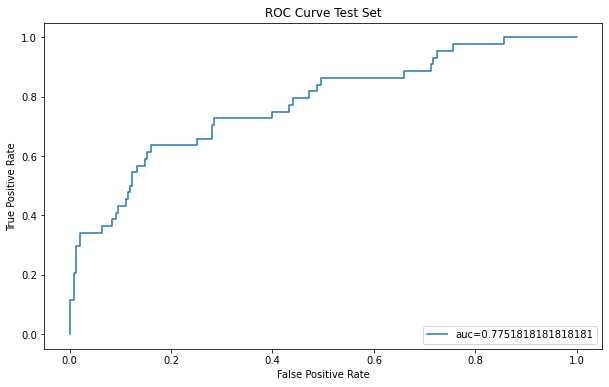

In [22]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       394
         1.0       0.96      1.00      0.98       530

    accuracy                           0.98       924
   macro avg       0.98      0.97      0.98       924
weighted avg       0.98      0.98      0.98       924

[[373  21]
 [  1 529]]
root mean squared error (RMSE): 0.1543033499620919
R-squared (R2 ): 0.9026530025859592
MAE 0.023809523809523808

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       250
         1.0       0.37      0.57      0.45        44

    accuracy                           0.79       294
   macro avg       0.64      0.70      0.66       294
weighted avg       0.83      0.79      0.81       294

[[207  43]
 [ 19  25]]
root mean squared error (RMSE): 0.45922146480918835
R-squared (R2 ): -0.657090909090909
MAE 0.2108843537414966

Accuracy score: 0.7891156462585034



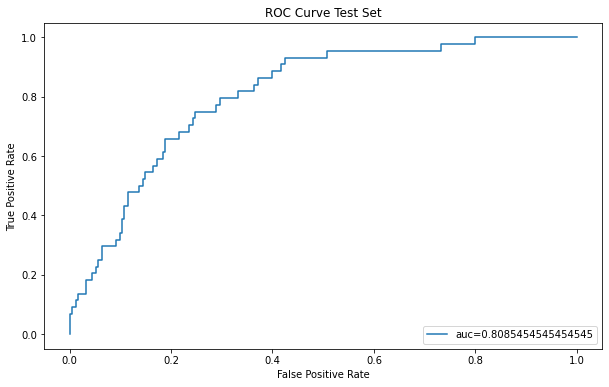

In [23]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

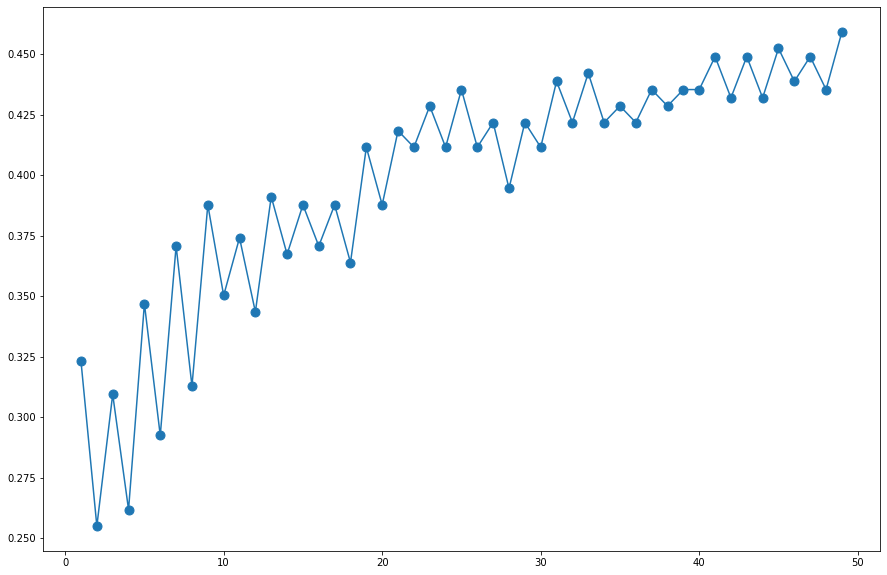

In [24]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89       394
         1.0       0.88      1.00      0.93       530

    accuracy                           0.92       924
   macro avg       0.94      0.90      0.91       924
weighted avg       0.93      0.92      0.92       924

[[319  75]
 [  0 530]]
root mean squared error (RMSE): 0.2849014411490949
R-squared (R2 ): 0.6681352360884973
MAE 0.08116883116883117

Testing SET
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79       250
         1.0       0.28      0.70      0.41        44

    accuracy                           0.69       294
   macro avg       0.61      0.70      0.60       294
weighted avg       0.83      0.69      0.73       294

[[172  78]
 [ 13  31]]
root mean squared error (RMSE): 0.5563486402641868
R-squared (R2 ): -1.4321818181818178
MAE 0.30952380952380953

Accuracy score: 0.6904761904761905



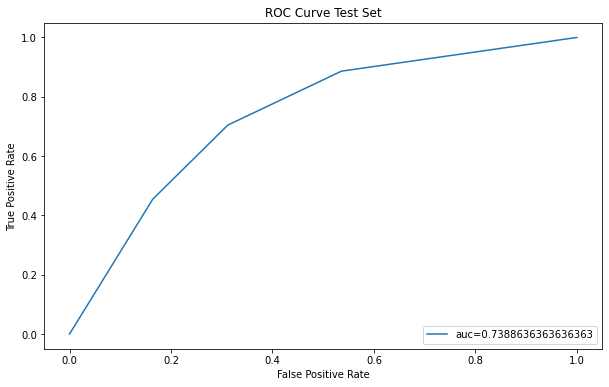

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)